## 建立隨機森林模型

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

### Step 1. 導入紅酒資料集

In [4]:
wine = load_wine()

### Step 2. 觀察資料集

In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
wine.data.shape

(178, 13)

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Step 3. 切分訓練測試資料集

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

### Step 4. 建立決策樹(單顆)以及隨機森林(預設10棵)模型

In [16]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

print("Single Tree: {}\n".format(score_c) + "Random Forest: {}".format(score_r))

Single Tree: 0.9444444444444444
Random Forest: 0.9814814814814815


### Step 5. 用交叉驗證比較兩種模型準確度

[0.94444444 1.         0.94444444 0.94444444 1.         1.
 1.         1.         1.         1.        ]
[0.88888889 0.88888889 0.61111111 0.88888889 0.83333333 0.88888889
 1.         0.94444444 0.94117647 0.70588235]


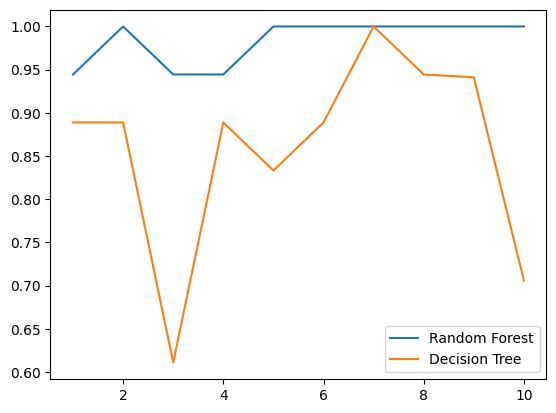

In [23]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)
print(rfc_s)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)
print(clf_s)

plt.plot(range(1, 11), rfc_s, label="Random Forest")
plt.plot(range(1, 11), clf_s, label="Decision Tree")
plt.legend()
plt.show()

### 建立十次模型, 總共做100次交叉驗證

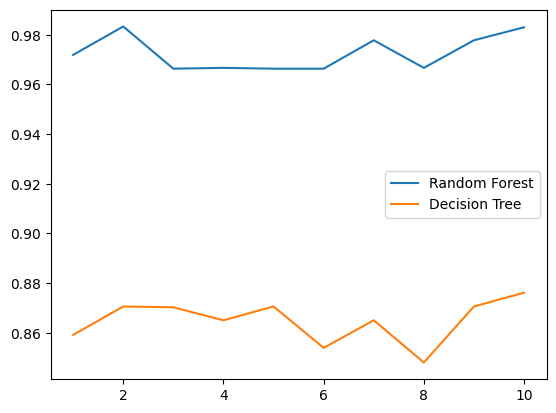

In [22]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.9888888888888889 23


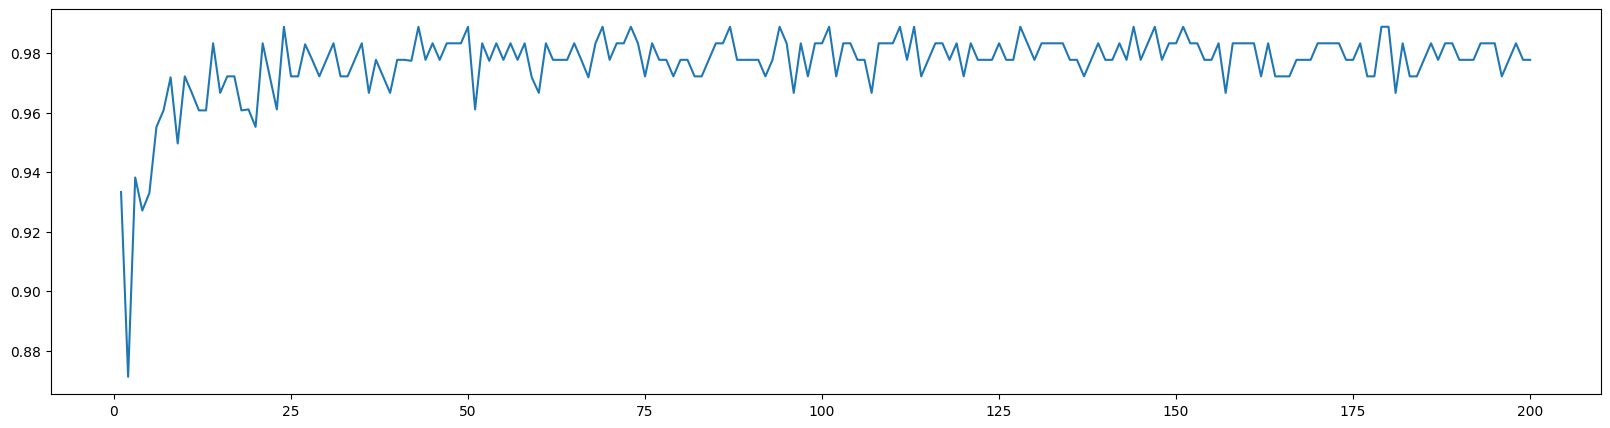

In [31]:
superpa = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))

plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

### 使用estimators_屬性, 查看隨機森林中每棵樹的狀況

In [36]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
 
# 隨機森林的屬性：estimators_, 查看森林中每棵樹的狀況
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [41]:
rfc.estimators_[0].random_state

1872583848

In [42]:
rfc.estimators_[0].max_features

'auto'

In [39]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


### 當樣本數足夠大時, 約有37%的數據未被使用, 沒有參與建模, 這些數據稱為袋外數據(out of bag data, oob); oob可作為測試集, 就不需劃分訓練集和測試集

In [45]:
#不需劃分訓練集和測試集
 
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
 
#使用oob_score_屬性, 查看在oob上測試結果
rfc.oob_score_

0.9719101123595506

### 查看隨機森林中每個特徵的重要性

In [49]:
feature_name = wine.feature_names

list(zip(rfc.feature_importances_, feature_name))

[(0.11085607912996583, 'alcohol'),
 (0.025850585698692176, 'malic_acid'),
 (0.013393819896441738, 'ash'),
 (0.028384303763809154, 'alcalinity_of_ash'),
 (0.026893311914154183, 'magnesium'),
 (0.067519818466548, 'total_phenols'),
 (0.13510456488582295, 'flavanoids'),
 (0.006388632943732335, 'nonflavanoid_phenols'),
 (0.022230118022392737, 'proanthocyanins'),
 (0.15018178846772975, 'color_intensity'),
 (0.10442883953350977, 'hue'),
 (0.11989812543684308, 'od280/od315_of_diluted_wines'),
 (0.18887001184035823, 'proline')]

In [50]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [51]:
rfc.score(Xtest, Ytest)

0.9814814814814815

In [52]:
rfc.feature_importances_

array([0.1111963 , 0.01767683, 0.01743021, 0.06617943, 0.03856115,
       0.05366806, 0.18686767, 0.00496362, 0.03074284, 0.14013538,
       0.11706386, 0.07081469, 0.14469996])

In [75]:
rfc.apply(Xtest)

array([[ 3,  3,  3, ...,  7, 11,  5],
       [12, 19, 23, ..., 16, 16, 17],
       [ 9, 12, 12, ..., 11, 11, 10],
       ...,
       [12, 19, 23, ..., 16, 16, 17],
       [11, 19, 17, ..., 16, 16, 17],
       [12, 19, 17, ..., 16, 16, 17]], dtype=int64)

In [57]:
rfc.predict(Xtest)

array([2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
rfc.predict_proba(Xtest)

array([[0.  , 0.08, 0.92],
       [0.96, 0.  , 0.04],
       [0.2 , 0.72, 0.08],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 0.28, 0.72],
       [0.  , 1.  , 0.  ],
       [0.08, 0.88, 0.04],
       [0.  , 0.04, 0.96],
       [0.04, 0.  , 0.96],
       [0.08, 0.92, 0.  ],
       [0.64, 0.36, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.44, 0.52, 0.04],
       [0.04, 0.96, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.76, 0.2 , 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 0.8 , 0.2 ],
       [0.12, 0.88, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.92, 0.08, 0.  ],
       [0.04, 0.92, 0.04],
       [0.16, 0.8 , 0.04],
       [0.72, 0.28, 0.  ],
       [0.04, 0.2 , 0.76],
       [0.  , 0.2 , 0.8 ],
       [0.96, 0.04, 0.  ],
       [0.88, 0.12, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.16, 0.8 ],
       [0.72, 0.24, 0.04],
 